# Projet de Maths-Info

### Préambule

In [1]:
# Python Standard Library
# -----------------------
pass

In [2]:
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

In [3]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [4]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [5]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

### Fonction quadratique

In [6]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

#on définit une fonction f1_bis qui nous servira pour Newton, 
#dans laquelle on rajoute la condition "le point est sur la ligne de niveau 0.8" et la condition "x1 = x2"
def f1_bis(x1, x2):
    a = (3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 - 0.8)
    b = x2 - x1
    return np.array([a,b])

### Fonction de Rosenbrock

In [7]:
def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

#on définit une fonction f2_bis qui nous servira pour Newton, 
#dans laquelle on rajoute la condition "le point est sur la ligne de niveau 1" et la condition "x1 = x2"
def f2_bis(x1,x2):
    a = (x1 - 1)**2 + (x1 - x2**2)**2 - 1.0
    b = x2 - x1
    return np.array([a,b])


### Fonction complexe

In [8]:
def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 

#on définit une fonction f3_bis qui nous servira pour Newton, 
#dans laquelle on rajoute la condition "le point est sur la ligne de niveau 0" et la condition "x1 = x2"
def f3_bis(x,y):
    a = np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) + 2.4
    b = y - x
    return np.array([a,b])

### Analyse des ensembles de niveaux

#### Question 1

D'après l'énoncé, $f:\mathbb{R}^2 \to \mathbb{R}$ est continue. Puisque {$c$} est un fermé de $\mathbb{R}$, l'image réciproque de {$c$} par $f$ est un fermé. L'ensemble de niveau $c$ est donc fermé.

$\mathbb{R}$ étant un espace métrique complet, on a donc de plus que l'ensemble de niveau $c$ est un espace complet car sous-ensemble fermé d'un espace complet.

De plus, $f$ vérifie $f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$. Soit $A>c$ , il existe donc un $x_0 = (x_{01}, x_{02})$ tel que pour tout $x \in \mathbb{R}^2$ vérifiant $\|x\|>\|(x_{01}, x_{02})\|$ on ait $f(x) > A > c$. Ainsi pour tout $(x_1,x_2)$ appartenant à la ligne de niveau $c$ on a $\|(x_1,x_2)\| < \|(x_{01}, x_{02})\|$.
L'espace $\left\{(x_1,x_2) , f(x_1,x_2) = c\right\}$ est donc borné. 

La ligne de niveau $c$ est donc un fermé borné de $\mathbb{R}$. C'est donc un compact.

#### Question 2

Soit $\overrightarrow{u} = (\partial_2 f(x_0), -\partial_1 f(x_0))$.
$\overrightarrow{u}$ est le vecteur $\overrightarrow{grad}f(x_0) = (\partial_1 f(x_0), \partial_2 f(x_0))$ ayant subi une rotation de $\frac{-\pi}{2}$ :  en effet . 

$p(x_1,x_2)$ correspond donc au produit scalaire de $\overrightarrow{u}$ et $\overrightarrow{x} = (x_1 - x_{01}, x_2 - x_{02})$ divisée par la norme de $\overrightarrow{u}$ ; c'est-à-dire qu'en considérant la base orthonormée $$(\frac{\overrightarrow{u}}{\|\nabla f(x_0)\|},\frac{\overrightarrow{\nabla}f(x_0)}{\|\nabla f(x_0)\|})$$ dont l'origine correspond au point $(x_{01},x_{02})$, $p(x_1,x_2)$ représente le projeté orthogonal de $\overrightarrow{x}$ sur le premier axe. 


Ainsi, $p(x_1,x_2)$ représente la première coordonnée du point $(x_1,x_2)$, après changement de repère, dans le nouveau repère orthonormé $((x_{01},x_{02}),\frac{\overrightarrow{u}}{\|\nabla f(x_0)\|},\frac{\overrightarrow{\nabla}f(x_0)}{\|\nabla f(x_0)\|})$

#### Question 3

On considère la fonction $\Phi:\mathbb{R}^2\times\mathbb{R} \to \mathbb{R}^2$ telle que $\Phi:((x_1,x_2),t) \mapsto (f(x_1,x_2) - c, t - p(x_1,x_2))$.

Les dérivées partielles de $p$ sont toutes définies et on a : $$\partial_{x_1} p(x_1,x_2) = \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}$$ $$et$$ $$\partial_{x_2} p(x_1,x_2) = - \frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|}$$

Ces deux fonctions sont bien continues en tout point de $\mathbb{R}^2$, et on a donc que $p$ est continûment différentiable.
$f$ étant par ailleurs supposée continûment différentiable, on en déduit que la fonction $\Phi$ l'est aussi par composition de fonctions continûment différentiables.

De plus, si on fixe $t_0 = p(x_{01},x_{02})$, on a : $$\partial_x \Phi (x_0,t_0) = J_{\Phi_{t_0}}(x_0) \ \mbox { où } \ \Phi_{t_0} : (x_1,x_2) \mapsto (f(x_1,x_2) - c, t_0 - p(x_1,x_2))$$
i.e $$\partial_x \Phi (x_0,t_0) =(\partial_{x_1} \Phi_{t_0} (x_0), \partial_{x_2} \Phi_{t_0} (x_0)) = \begin{pmatrix} \partial_{x_1} f(x_0) & \partial_{x_2} f(x_0) \\ -\partial_{x_1} p(x_0) & -\partial_{x_2} p(x_0) \end{pmatrix} = \begin{pmatrix} \partial_{x_1} f(x_0) & \partial_{x_2} f(x_0) \\ \frac{-\partial_{x_2} f(x_0)}{\|\nabla f(x_0)\|} & \frac{\partial_{x_1} f(x_0)}{\|\nabla f(x_0)\|} \end{pmatrix} $$

On a alors $det(J_{\Phi_{t_0}}(x_0)) = \frac{1}{\|\nabla f(x_0)\|} \times \|\nabla f(x_0)\|^2 = \|\nabla f(x_0)\| \neq 0$. 

La matrice est donc inversible au point $(x_0,t_0)$, et il existe nécessairement un voisinage $W$ de $(x_0,t_0)$ tel que $det(J_{\Phi_{t}}(x)) \neq 0$ pour tout $(x,t) \in W$, i.e tel quel $\partial_x \Phi$ soit inversible en tout point de $W$.

Enfin, par hypothèse, on a que : $\Phi((x_{01},x_{02}),p(x_{01},x_{02})) = (0,0)$.

On peut donc appliquer le théorème des fonctions implicites à $\Phi$ sur l'ouvert $W$ : il existe des voisinages ouverts $U$ de $x_0$ et $V$ de $t_0$ tels que $U \times V \subset W$ et une unique fonction implicite $\gamma : V \mapsto \mathbb{R}^2$ continûment différentiable telle que pour tout $t \in V$ et tout $x \in U$:

$$ \Phi(x_1,x_2,t) = 0 \Leftrightarrow (x_1,x_2) = \gamma(t) $$ 
$$ \mbox {où on a nécessairement: } t - p(x_1,x_2) = 0 \ \ \mbox { i.e } \ \ t = p(x_1,x_2) $$





#### Question 4

- Avec le théorème des fonctions implicites, on a : $$\forall t \in \left]-\varepsilon,\varepsilon \right[, d\gamma(t) = - (\partial_x\Phi(x,t))^{-1}\cdot \partial_t\Phi(x,t).$$

    Or pour tout $h \in \mathbb{R}$, $d\gamma(t)\cdot h = \gamma'(t)\times h$. De ce fait : $$\gamma'(t) \neq 0 \Leftrightarrow d\gamma(t) \cdot h \neq 0 \, (\forall h \in \mathbb{R}\setminus\lbrace{0}\rbrace)$$

    Or $(\partial_x\Phi(x,t))^{-1}= \frac{\|\nabla f(x_0)\|}{\|\nabla f(x)\|^2} \begin{pmatrix} \frac{\partial_{x_1} f(x)}{\|\nabla f(x_0)\|} & \frac{\partial_{x_2} f(x)}{\|\nabla f(x_0)\|} \\ -\partial_{x_2} f(x) & \partial_{x_1} f(x) \end{pmatrix}$. 
    
    De plus, $\partial_t\Phi(x,t) = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ donc finalement pour $h \neq 0$: $$\partial_x\Phi(x,t)^{-1}\cdot \partial_t\Phi(x,t) \cdot h = \frac{\|\nabla f(x_0)\| \times h}{\|\nabla f(x)\|^2} \begin{pmatrix} \frac{\partial_{x_2} f(x)}{\|\nabla f(x_0)\|} \\ \partial_{x_1} f(x) \end{pmatrix} \neq 0 $$ puisque $x = \gamma(t)$ appartient au voisinage de $x_0$ dans lequel le gradient ne s'annule pas.
    
    
- Soit $t \in \left ]-\varepsilon,\varepsilon \right[$, on a alors:

    $\langle \nabla f(\gamma(t)), \gamma'(t)\rangle$ 

    $= df(\gamma(t))\cdot \gamma'(t) $

    $= df(\gamma(t))\cdot (d\gamma(t)\cdot 1) $

    $= d(f\cdot\gamma)(t)\cdot 1 \;$ or $\; f\cdot\gamma = c \;$ i.e $\; d(f\cdot\gamma)(t) = 0_{\mathcal{L}(\mathbb{R},\mathbb{R})}$
    
    $= 0 \cdot 1$
    
    $= 0$
    
    Les deux vecteurs sont donc bien orthogonaux. 


#### Question 5

In [9]:
N=100

#On doit avoir un degré de précision plus grand que la précision informatique, ie plus grand que 10e-16
#On peut donc se permettre d'aller jusqu'à 10e-15, mais cela paraît trop précis pour le programme en question
#où la largeur de la ligne est largement supérieure au epsilon. Prenons donc une valeur plus raisonnable
#qui ne ralentisse pas le process

eps = 10e-5

#### Tâche 1

In [10]:
def Newton(F, x0, y0, eps=eps, N=100):
    Jfonct = J(F)
    for i in range(N):
        J_F = Jfonct(x0,y0)
        inv_J_F = np.linalg.inv(J_F)

        (x,y) = (x0,y0) - np.dot(inv_J_F,F(x0,y0))
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

#### Tâche 2

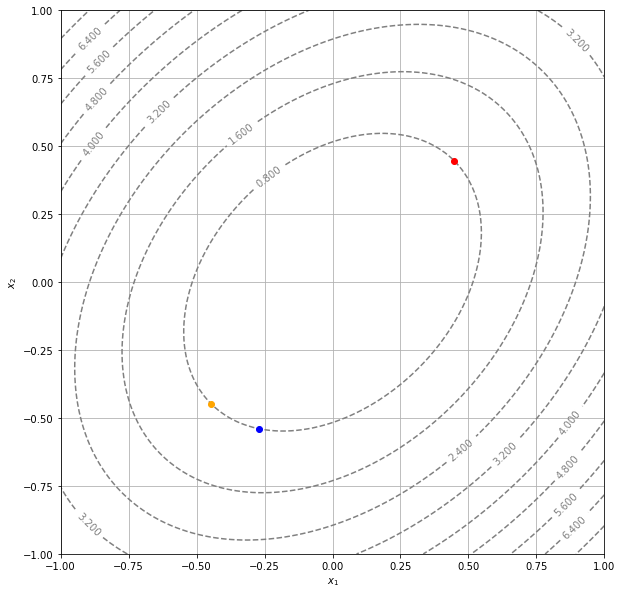

In [11]:
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

#point de la consigne représenté en rouge
(x0,y0) = Newton(f1_bis,0.8,0.8)
plt.plot(x0,y0,'ro')

#on change le point initial, et on représente le résultat en orange
(x1, y1) = Newton(f1_bis,-0.5,-0.5)
plt.plot(x1,y1,'o', color = 'orange')



#on modifie la contrainte par x2 = 2*x1 et on représente le résultat en bleu
def f1_bis2(x1, x2):
    a = (3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 - 0.8)
    b = x2 - 2*x1
    return np.array([a,b])

(x2,y2) = Newton(f1_bis2,-0.25,-0.5)
plt.plot(x2,y2,'bo')

plt.show()


#### Question 6

La méthode utilisée est détaillée ci-dessous au sein de la fonction level_curve. A chaque itération, on calcule en fait le gradient au nouveau point trouvé par Newton noté $(x_1,y_1)$, on fait pivoter ce vecteur de $- \frac{\pi}{2} $ et on le normalise afin d'avoir un vecteur unitaire $(u,v)$ pointant dans la direction "à droite" du point. On multiplie finalement ce vecteur par delta et on applique alors Newton au nouveau point défini par $(x_1 + \delta\times u,y_1 + \delta\times v)$, situé dans la bonne direction et à la bonne distance du point $(x_1,y_1)$. Cette méthode n'est cependant pas infaillible puisque même en se déplaçant approximativement dans la bonne direction, la méthode de Newton qui s'appuye sur les tangentes peut nous faire revenir au point précédent en boucle, comme on le voit dans les exemples qui suivent. 

#### Tâche 3

In [12]:
#Nous nous sommes permis de rajouter un paramètre c qui indique la valeur de la courbe de niveau afin de faciliter
#l'utilisation de la fonction lors des exemples

def level_curve(f, x0, y0, c, delta=0.1, N=1000, eps=eps):
    liste_x = [x0]
    liste_y = [y0]

    # on définit une nouvelle fonction F issue de f et allant de R^2 dans R^2 
    # afin de vérifier avec la méthode de Newton: 
        #1) la condition "le point est sur la ligne de niveau c"
        #2) la condition "le nouveau point est à distance delta du point précédent"
    def F(x,y):
        dist = np.sqrt((x - x1)**2 + (y - y1)**2)
        return np.array([f(x,y) - c, dist - delta ])
    
    # on initialise (x1,y1)
    (x1,y1) = (x0,y0)

    for n in range (N-1):
        # on note d'abord (u,v) les coordonnées du grad(f) au point (x1,y1), puis on met dans (u,v) 
        # les coordonnées du vecteur orthogonal au grad pointant dans la direction 
        # "à droite" de celui-ci, qu'on multiplie par la distance delta
        (u,v) = grad(f)(x1,y1)
        (u,v) = np.array(delta) * (v,-u) / np.sqrt(u**2 + v**2)

        # on appelle (x,y) le point donné par (x1,y1) + (u,v) 
        # (on part du point (x1,y1) et on se déplace d'une distance delta selon le vecteur (u,v))
        (x,y) = (x1+u,y1+v)

        # le point donné par Newton(F,x,y) est notre prochain point d'annulation 
        # et donc notre nouveau point (x1,y1)
        (x1,y1) = Newton(F,x,y)

        # on n'oublie pas de rajouter ce point à la liste des points d'annulation
        liste_x.append(x1)
        liste_y.append(y1)
        
    liste = liste_x + liste_y
        
    tab = np.array(liste)
    tab = np.reshape(tab,(2,N))
    return tab

##### Test

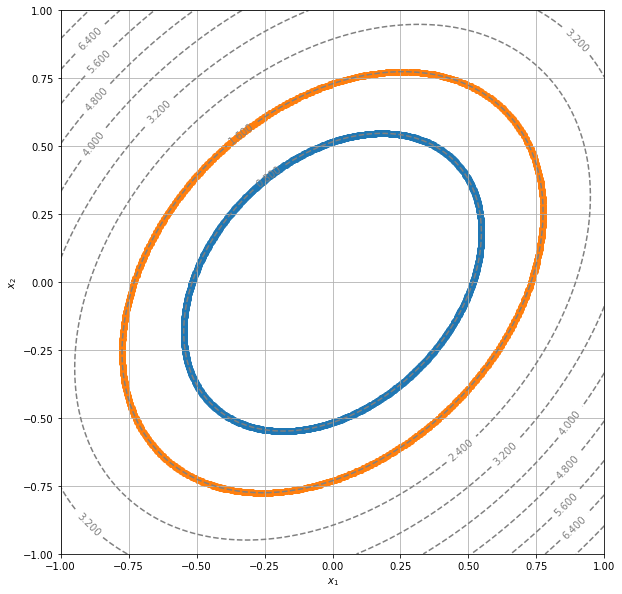

In [13]:
##on teste notre fonction avec l'exemple 1 

display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

#(on rappelle que f1_bis est la fonction (x,y)-->(f1(x,y)-0.8,x-y))
(x0,y0) = Newton(f1_bis,0.8,0.8)
contour = level_curve(f1,x0,y0,0.8)
plt.scatter(contour[0,:], contour[1,:])


# on définit une troisième version de f1 pour déterminer un point de la ligne de niveau 1.6
def f1_ter(x1, x2):
    a = (3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 - 1.6)
    b = x2 - x1
    return np.array([a,b])

(x0,y0) = Newton(f1_ter,1.6,1.6)
contour = level_curve(f1,x0,y0,1.6)
plt.scatter(contour[0,:], contour[1,:])

plt.show()

[[ 0.46467057  0.52178987  0.46467057  0.52178986  0.46467057  0.52178986
   0.46467056  0.52178985  0.46467056  0.52178985]
 [-0.05190318  0.03017841 -0.05190318  0.0301784  -0.05190319  0.0301784
  -0.05190319  0.03017839 -0.0519032   0.03017839]]


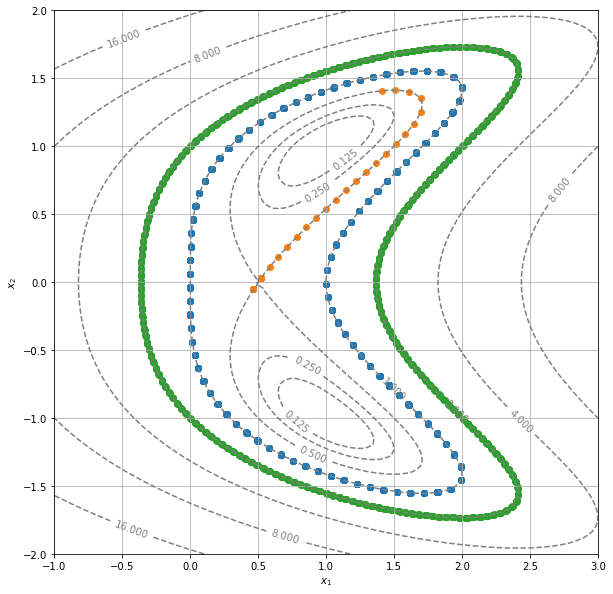

In [14]:
# on teste avec la fonction 2

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

(x0,y0) = Newton(f2_bis,2.0,2.0)
contour = level_curve(f2,x0,y0,1.0)
plt.scatter(contour[0,:], contour[1,:])


#nouvelle fonction pour la courbe de niveau 0.5
def f2_ter(x1,x2):
    a = (x1 - 1)**2 + (x1 - x2**2)**2 - 0.5
    b = x2 - x1
    return np.array([a,b])

(x0,y0) = Newton(f2_ter,1.5,1.5)
contour = level_curve(f2,x0,y0,0.5)
print(contour[:,990:])
plt.scatter(contour[0,:], contour[1,:])

#nouvelle fonction pour la courbe de niveau 2.0
def f2_quatr(x1,x2):
    a = (x1 - 1)**2 + (x1 - x2**2)**2 - 2.0
    b = x2 - x1
    return np.array([a,b])

(x0,y0) = Newton(f2_quatr,-0.5,-0.5)
contour = level_curve(f2,x0,y0,2.)
plt.scatter(contour[0,:], contour[1,:])
plt.show()


#on voit que la deuxième courbe (orange) ne se trace pas entièrement : 
#on a un problème arrivés au point (0.5217994,0.03017841) puisque la fonction alterne alors 
#entre ce point et le précédent en boucle (le gradient s'annule entre ces deux points), 
#montrant bien les limites de la fonction level_curve

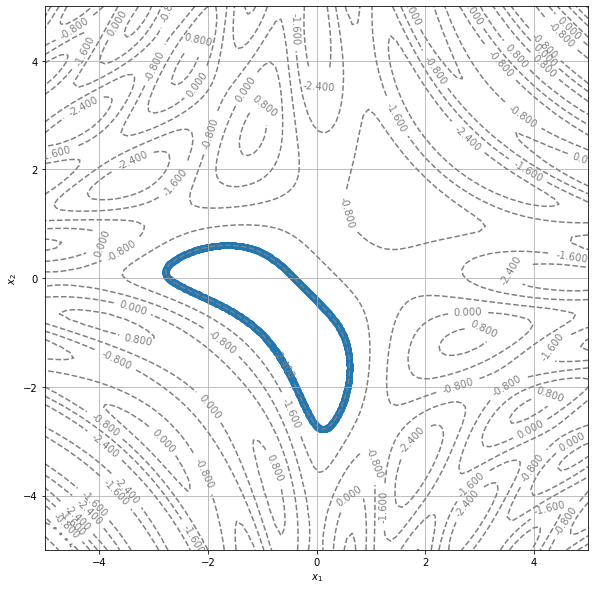

In [15]:
#on teste avec la fonction 3

display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

(x0,y0) = Newton(f3_bis,-0.4,-0.4)
contour = level_curve(f3,x0,y0,-2.4)
plt.scatter(contour[0,:], contour[1,:])
plt.show()

#on observe qu'on n'atteint que les points connexes au point de départ, il faudrait donc adapter la méthode 
#en quadrillant au préalable la zone pour trouver des points appartenant aux différentes "boucles" et éventuellement
#en supprimer par la suite s'ils appartiennent à la même "boucle".

#### Tâche 4

In [16]:
def level_curve_better(f, x0, y0, c, delta=0.1, N=1000, eps=1e-10):
    liste_x = [x0]
    liste_y = [y0]
    
    liste_alpha = []
    liste_beta = []

    # on définit une fonction F issue de f et allant de R^2 dans R^2 
    # afin de vérifier aussi la condition "le nouveau point est à distance delta du point précédent"
    def F(x,y):
        dist = np.sqrt((x - x1)**2 + (y - y1)**2)
        return np.array([f(x,y) - c, dist - delta ])
    
    # on initialise (x1,y1)
    (x1,y1) = (x0,y0)

    for n in range (N-1):
        # on note d'abord (u,v) les coordonnées du grad(f) au point (x1,y1), puis on met dans (u,v) 
        # les coordonnées du vecteur orthogonal au grad pointant dans la direction 
        # "à droite" de celui-ci, qu'on multiplie par la distance delta
        (u,v) = grad(f)(x1,y1)
        (u,v) = np.array(delta) * (v,-u) / np.sqrt(u**2 + v**2)

        # on appelle (x,y) le point donné par (x1,y1) + (u,v) 
        # (on part du point (x1,y1) et on se déplace d'une distance delta selon le vecteur (u,v))
        (x,y) = (x1+u,y1+v)

        # le point donné par Newton(F,x,y) est notre prochain point d'annulation 
        # et donc notre nouveau point (x1,y1)
        (x1,y1) = Newton(F,x,y)
        
        #sinon, on n'oublie pas de rajouter ce point à la liste des points d'annulation
        liste_x.append(x1)
        liste_y.append(y1)
        
        # on calcule le coeff directeur du dernier segment en date 
        # si segment AB, yb = alpha * xb + bêta, et ya = alpha * xa + bêta
        
        xa,xb,ya,yb = liste_x[-2],x1,liste_y[-2],y1
        # le dernier segment est le segment [AB]
        
        
        if xb == xa :
            # on se retrouve dans le cas où le segment est "vertical" i.e qui suit la direction de la pesanteur,
            # du fil à plomb en un lieu 
            alpha1 = "infini"
            beta1 = "-infini"
        else:
            # sinon, on peut calculer le coefficient directeur alpha1 et l'ordonnée à l'origine beta1 de la droite
            # portée par le segment AB
            alpha1 = (yb-ya)/(xb-xa)
            beta1 = yb - alpha1*xb
            
        liste_alpha.append(alpha1)
        liste_beta.append(beta1)
        
        p = len(liste_alpha) # p = nombre de points déjà enregistrés, il y a donc p-1 segments en tout, et p-2 sans compter le dernier
        for i in range(p-2): # on compare le dernier segment aux p-2 déjà créés
            
            alpha2 = liste_alpha[i]
            beta2 = liste_beta[i]
            
            min_y = min(liste_y[i],liste_y[i+1])
            max_y = max(liste_y[i],liste_y[i+1])
            min_x = min(liste_x[i],liste_x[i+1])
            max_x = max(liste_x[i],liste_x[i+1])
            
                    
            if alpha1 == "infini" :
                # cas particulier 1 où le segment AB est vertical
                if min_x <= xa <= max_x:
                    if min_y <= max(ya,yb) <= max_y or min_y <= min(ya,yb) <= max_y:
                        liste_x.pop()
                        liste_y.pop()
                        taille = len(liste_x)
                        liste = liste_x + liste_y
                        tab = np.array(liste)
                        tab = np.reshape(tab,(2,taille))
                        return tab 
                    
            elif alpha2 == "infini":
                # cas particulier 2 où le segment (point[i],point[i+1]) est vertical
                if min(xa,xb) <= liste_x[i] <= max(xa,xb):
                    if min_y <= max(ya,yb) <= max_y or min_y <= min(ya,yb) <= max_y:
                        liste_x.pop()
                        liste_y.pop()
                        taille = len(liste_x)
                        liste = liste_x + liste_y
                        tab = np.array(liste)
                        tab = np.reshape(tab,(2,taille))
                        return tab 
                
            elif alpha1 != alpha2: #en gros, les droites portées par alpha1 et alpha2 se croisent, en pratique, quasi toujours vrai
                xinter = (beta2-beta1)/(alpha1 - alpha2)
                yinter = alpha1*xinter + beta1
                
                # on a calculé ici les coordonnées du point d'intersection entre la droite portée par le dernier segment et celle portée
                # par le (i+1)-ème
                # il reste à vérifier que ce point d'intersection est dans les segments (alors les segments s'intersectent)
                
                xmax1 = max(xb,xa)
                xmin1 = min(xb,xa)
                xmax2 = max(liste_x[i+1],liste_x[i])
                xmin2 = min(liste_x[i+1],liste_x[i])
                
                if (xinter <= xmax1 and xinter >= xmin1) and (xinter <= xmax2 and xinter >= xmin2 ) : 
                    # si True, ici le point (xinter,yinter) est entre A et B, donc sur le dernier segment, et ce dernier intersecte donc
                    # le (i+)-ème segment, on renvoie donc la liste actuelle de points
                    liste_x.pop()
                    liste_y.pop()
                    taille = len(liste_x)
                    liste = liste_x + liste_y
                    tab = np.array(liste)
                    tab = np.reshape(tab,(2,taille))
                    return tab
                
                
            elif alpha1 == alpha2:
                if min_x <= max(xa,xb) <= max_x or min_x <= min(xa,xb) <= max_x:
                    liste_x.pop()
                    liste_y.pop()
                    taille = len(liste_x)
                    liste = liste_x + liste_y
                    tab = np.array(liste)
                    tab = np.reshape(tab,(2,taille))
                    return tab
                
            
        
    taille = len(liste_x)  
    liste = liste_x + liste_y
 
    tab = np.array(liste)
    tab = np.reshape(tab,(2,taille))
    return tab

#### Question 7

Faute d'être en mesure de juger la "fréquence d'apparition" de fonctions similaires à la fonction de Rosenbrock dans le monde des mathématiques, on adopte ici un raisonnement qualitatif. En faisant l'analogie entre le monde des fonctions de $\mathbb{R}^2$ dans $\mathbb{R}$ et le monde réel, les lignes de niveau d'une fonction sont les lignes de niveau d'une montagne, et les points d'auto-intersection sont alors les cols. Ces derniers sont relativement rares à la surface de la Terre en comparaison de tous les lieux de "non-cols". En conséquence, on considèrera que les courbes de niveau auto-intersectantes sont plutôt rares, et qu'il suffit de tester si le dernier segment intersecte le premier pour l'algorithme de `level_curve`

#### Tâche 5

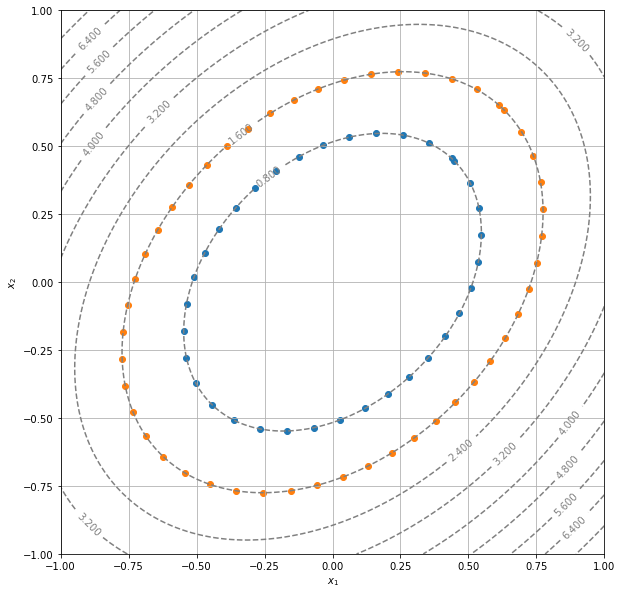

In [17]:
#on teste avec la fonction 1

display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

#(on rappelle que f1_bis est la fonction (x,y)-->(f1(x,y)-0.8,x-y))
(x0,y0) = Newton(f1_bis,0.8,0.8)
contour = level_curve_better(f1,x0,y0,0.8)
plt.scatter(contour[0,:], contour[1,:])


# on rappelle que la fonction f1_ter est la fonction (x,y)-->(f1(x,y)-1.6,x-y)

(x0,y0) = Newton(f1_ter,1.6,1.6)
contour = level_curve_better(f1,x0,y0,1.6)
plt.scatter(contour[0,:], contour[1,:])

plt.show()

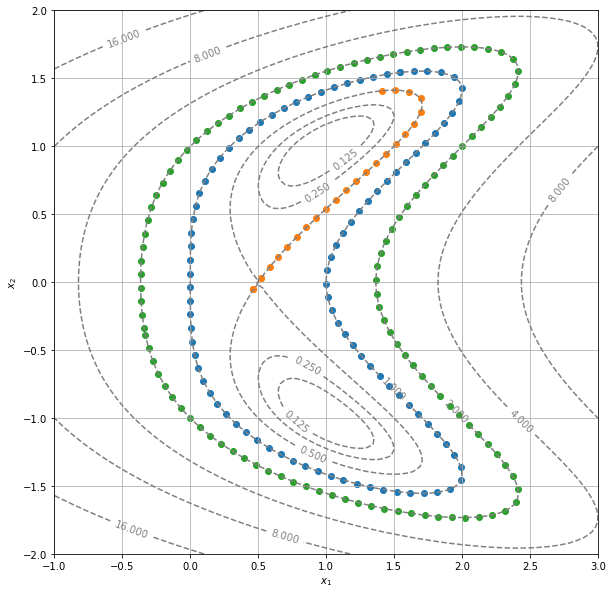

In [18]:
# on teste avec la fonction 2

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

(x0,y0) = Newton(f2_bis,2.0,2.0)
contour = level_curve_better(f2,x0,y0,1.0)
plt.scatter(contour[0,:], contour[1,:])


#on rappelle que f2_ter est la fonction (x,y) -> (f(x,y) - 0.5, x-y)

(x0,y0) = Newton(f2_ter,1.5,1.5)
contour = level_curve_better(f2,x0,y0,0.5)
plt.scatter(contour[0,:], contour[1,:])

#on rappelle que f2_quatr est la fonction (x,y) -> (f(x,y) - 2, x-y)

(x0,y0) = Newton(f2_quatr,-0.5,-0.5)
contour = level_curve_better(f2,x0,y0,2.)
plt.scatter(contour[0,:], contour[1,:])
plt.show()


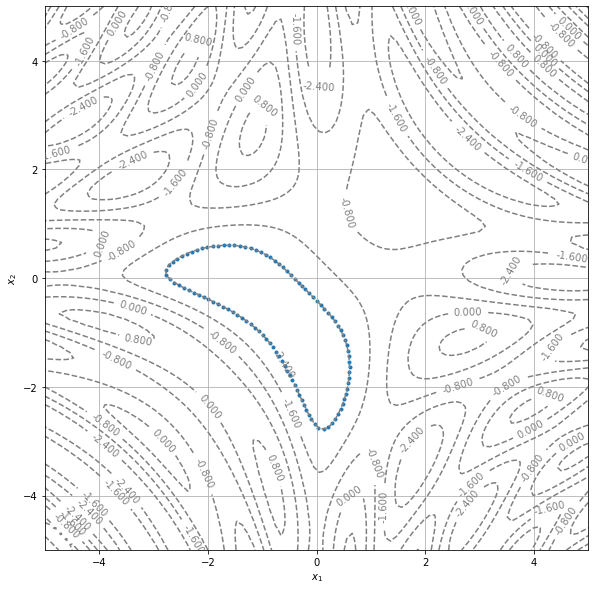

In [19]:
#on teste avec la fonction 3

display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

(x0,y0) = Newton(f3_bis,-0.4,-0.4)
contour = level_curve_better(f3,x0,y0,-2.4)
plt.scatter(contour[0,:], contour[1,:],marker = '.')
plt.show()

#### Question 8

$\forall t \in \left]-\varepsilon, \varepsilon \right[$ :
        $$
        \gamma(t) = (x(t), y(t)) \; \mbox{avec} \; x(t) = a + bt + ct^2 \; \mbox{ et } \; y(t) = d + et + ft^2
        $$

$\forall t \in \left]-\varepsilon, \varepsilon \right[$ :
        $$
        \gamma'(t) = (x'(t), y'(t)) = (b + 2ct, e + 2ft)
        $$
        
On connaît $\vec{u}_{1}$ = ($u_{1x},u_{1y}$) $\;$  $\vec{u}_{2}$ = ($u_{2x},u_{2y}$) $\;$ $P_{1} = (P_{1x},P_{1y}) \; \mbox{et }  P_{2} = (P_{2x},P_{2y})$

On dispose de la relation : $\gamma(0) = P_{1} = (a,d)$

D'où : 
        $$
        \left\{\begin{matrix}
        a = P_{1x}\\ 
        d = P_{1y}
        \end{matrix}\right. \;\;\;\;\;\;\;\;\;\;\; (1)
        $$
        
Puisque $\gamma'(0) \; et \; \gamma'(1)$ doivent être orientés respectivement selon $\vec{u}_{1}$ et $\vec{u}_{2}$, on a :


$\exists \alpha > 0 \; tel \; que : \; \gamma'(0) = \alpha \vec{u}_{1} $


$\exists \beta > 0 \; tel \; que : \; \gamma'(1) = \beta \vec{u}_{2} $

D'où : 
        $$
        \left\{\begin{matrix}
        b = \alpha u_{1x}\\ 
        e = \alpha u_{1y}
        \end{matrix}\right. \;\;\;\;\;\;\;\; (2)  \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
        \left\{\begin{matrix}
        b + 2c = \beta u_{2x}\\ 
        e + 2f = \beta u_{2y}
        \end{matrix}\right. \;\;\;\;\;\;\;\; (3)
        $$
        

De plus, avec la dernière relation dont on dispose : $\gamma(1) = P_{2} = (P_{2x},P_{2y}) = (a + b + c,\; d + e + f) \;\;\;\;\;\;\;\;\;\;\; $(4)

En utilisant (4) et (2), qu'on réinjecte dans (3) on a : 
        $$
        \left\{\begin{matrix}
        \beta u_{2x} = 2(b+c) - b = 2(b+c) - \alpha u_{1x}\\ 
        \beta u_{2y} = 2(e+f) - e = 2(e+f) - \alpha u_{1y}
        \end{matrix}\right.
        $$
        
        
$$
        \left\{\begin{matrix}
        \beta u_{2x} = 2(P_{2x}-P_{1x}) - \alpha u_{1x}\\ 
        \beta u_{2y} = 2(P_{2y}-P_{1y}) - \alpha u_{1y}
        \end{matrix}\right.
        \;\;\;\;\;\;\;\; (5)$$
        


On a $\vec{u}_{1} \neq \vec{0}$ donc :


- **On suppose $u_{1x} \neq 0$**


Alors $\alpha = \frac{1}{u_{1x}} (2(P_{2x}-P_{1x}) - \beta u_{2x}) \;\;\;\;\;\;\;\;\;\;\; (6)$


 $\;\;\;\;\;\;\;\;\;\;\;$ -  De plus, si on a $u_{1x}u_{2y} - u_{1y}u_{2x} \neq 0$, c'est-à-dire si $\begin{vmatrix}
u_{1x} & u_{2x}\\ 
u_{1y} & u_{2y}
\end{vmatrix}
\neq 0$, donc **si $\vec{u}_{1}$ et $\vec{u}_{2}$ sont non colinéaires**, alors on obtient :


$$
\beta = \frac{2u_{1x}(P_{2y}-P_{1y}) - 2u_{1y}(P_{2x}-P_{1x})}{u_{1x}u_{2y} - u_{1y}u_{2x}} \;\;\;\;\;\;\;\;\;\;\; (7)$$


On revient ensuite aux variables à déterminer avec (2) et (3) ce qui nous donne : ($\beta$ et $\alpha$ sont donnés par (7) et (6) respectivement)
$$
\left\{\begin{matrix}
a = P_{1x}\\ 
d = P_{1y}\\ 
b = \alpha u_{1x}\\ 
e = \alpha u_{1y}\\ 
c = \frac{1}{2}(\beta u_{2x} -  \alpha u_{1x})\\ 
f = \frac{1}{2}(\beta u_{2y} -  \alpha u_{1y})
\end{matrix}\right.\;\;\;\;\;\;\;\;\;\;\; (A) $$


 $\;\;\;\;\;\;\;\;\;\;\;$ - **Si $\vec{u}_{1}$ et $\vec{u}_{2}$ sont colinéaires**, on a $\exists \lambda \neq 0 , \vec{u}_{2} = \lambda \vec{u}_{1}$
$$
\lambda = \frac{u_{2x}}{u_{1x}} \;\;\;\;\;\;\;\;\;\;\; (8)$$


Cependant, on a "perdu" une des relations liant nos 8 inconnues, on n'en a plus que 7, et il nous est donc impossible de conclure.


On a toutefois l'égalité : $u_{1x}(P_{2y}-P_{1y}) = u_{1y}(P_{2x}-P_{1x}) \;\;\;\;\;\;\;\;\;\;\; (9)$

- **On suppose maintenant que $u_{1x} = 0$ :**


$\vec{u}_{1} \neq \vec{0}$ donc nécessairement $\vec{u}_{1y} \neq 0$


On a donc, avec (5) : $\alpha = \frac{1}{u_{1y}}(2(P_{2y}-P_{1y}) - \beta u_{2y}) \;\;\;\;\;\;\;\;\;\;\; (10)$


 $\;\;\;\;\;\;\;\;\;\;\;$ - **Si $u_{2x} \neq 0$**, on peut également dire que : 
$$
\beta = \frac{2}{u_{2x}}(P_{2x}-P_{1x}) \;\;\;\;\;\;\;\;\;\;\; (11)$$

Et finalement en revenant aux variables de la fonction $\gamma$ : 
$$
\left\{\begin{matrix}
a = P_{1x}\\ 
d = P_{1y}\\ 
b = 0\\ 
e = \alpha u_{1y}\\ 
c = \frac{1}{2}\beta u_{2x}\\ 
f = \frac{1}{2}(\beta u_{2y} -  \alpha u_{1y})
\end{matrix}\right.  \;\;\;\;\;\;\;\;\;\;\; (B) $$

 $\;\;\;\;\;\;\;\;\;\;\;$ - **Enfin, si $u_{2x} = 0$**, on a avec $\vec{u}_{2} \neq \vec{0}: \;\;\;\;\; u_{2y} \neq 0$


Avec (2), (3) et (5), on obtient : 
$$
\left\{\begin{matrix}
b = 0\\ 
c = 0\\ 
P_{1x} = P_{2x} 
\end{matrix}\right. \;\;\;\;\;\; (12)$$


On a désormais 4 inconnues : e, f, $\alpha$ et $\beta$ pour seulement 3 équations : les deuxièmes lignes de (2), (3) et (4)


Il nous est donc impossible de conclure sur des valeurs déterminées de e et f sans supposer arbitrairement une valeur pour $\alpha$ ou $\beta$. Encore une fois, **si $\vec{u}_{1}$ et $\vec{u}_{2}$ sont colinéaires**, cela nous pose problème.

**Pour conclure :**
- Si $u_{1x} \neq 0$ et si $\vec{u}_{1}$ et $\vec{u}_{2}$ ne sont pas colinéaires, on détermine les coefficients de $\gamma$ avec **(A)**
- Si $u_{1x} \neq 0$ et si $\vec{u}_{1}$ et $\vec{u}_{2}$ sont colinéaires, on ne peut pas déterminer les coefficients de $\gamma$ mais on dispose de la relation **(9)** reliant les points $P_{1}$ et $P_{2}$ et les vecteurs $\vec{u}_{1}$ et $\vec{u}_{2}$
- Si $u_{1x} = 0$ et si $\vec{u}_{1}$ et $\vec{u}_{2}$ ne sont pas colinéaires, i.e. si $u_{2x} \neq 0$, on détermine les coefficients de $\gamma$ avec **(B)**
- Si $u_{1x} = 0$ et si $\vec{u}_{1}$ et $\vec{u}_{2}$ sont colinéaires, i.e. si $u_{2x} = 0$, on ne peut pas déterminer les coefficients de $\gamma$ mais on dispose de la relation **(12)** liant $P_{1x}$ et $P_{2x}$


**ATTENTION :** Dans les cas **(A)** et **(B)**, il faut tout de même vérifier qu'on a $\alpha > 0$ et $\beta > 0$ car sinon on ne vérifie pas la condition "$\gamma'(0)$ dans le même sens que $\vec{u}_{1}$" ou "$\gamma'(1)$ dans le même sens que $\vec{u}_{2}$"

#### Tâche 6

In [20]:
def gamma(t,P1,P2,u1,u2):
    P1x,P1y = P1
    P2x,P2y = P2
    u1x, u1y = u1
    u2x, u2y = u2
    #on récupère les différentes coordonnées puisque ce sont elles que nous allons manipuler par la suite 
    #on calcule ensuite le chemin d'erreur, c'est un calcul inutile en général, mais il allège le code par la suite.
    #Pour diminuer le temps d'éxécution de gamma, on pourrait calculer ce chemin uniquement à l'intérieur des blocs d'erreur "if"
    #chemin en ligne droite : gamma(t) = a*t + b (t est un vecteur), où b = (P1x,P1y) et a = (P2x-P1x, P2y-P1y)
    liste_erreur = np.array([[P2x-P1x], [P2y-P1y]])*t + np.array([[P1x],[P1y]])
    
    
    if u1x*u2y == u1y*u2x : 
        #Si True, alors vecteurs colinéaires, on est dans une impasse, on renvoie le chemin en ligne droite
        return liste_erreur
    
    elif u1x != 0 :
        #on est dans le cas de figure (A)
        beta = (2*u1x*(P2y-P1y) - 2*u1y*(P2x-P1x))/(u1x*u2y - u1y*u2x)
        alpha = (2*(P2x-P1x) - beta*u2x)/u1x
        a = P1x
        d = P1y
        b = alpha*u1x
        e = alpha*u1y
        c = (beta*u2x - alpha*u1x)/2
        f = (beta*u2y - alpha*u1y)/2
        
        if alpha <= 0 or beta <= 0 :
            #on n'aura pas gamma' dans le même sens que u1 ou u2 en 0 ou en 1
            return liste_erreur
        
        #on sépare abscisses et ordonnées car leur image n'est pas calculée de la même manière
        nouvelles_abscisses = a + b*t + c*t**2
        nouvelles_ordonnées = d + e*t + f*t**2
        return nouvelles_abscisses, nouvelles_ordonnées
    
    elif u2x != 0 : 
        #à ce stade ça devrait être toujours vrai car si u2x = 0, sachant qu'on a déjà u1x = 0, on aurait colinéarité des vecteurs
        #on aurait donc pu simplement utiliser else, on utilise elif ici pour des raisons de lisibilité du code
        #on est dans le cas de figure (B)
        beta = (2*(P2x-P1x))/u2x
        alpha = (2*(P2y-P1y) - beta*u2y)/u1y
        a = P1x
        d = P1y
        b = 0
        e = alpha*u1y
        c = (beta*u2x)/2
        f = (beta*u2y - alpha*u1y)/2
        
        if alpha <= 0 or beta <= 0 :
            #on n'aura pas gamma' dans le même sens que u1 ou u2 en 0 ou en 1
            return liste_erreur
        
        nouvelles_abscisses = a + b*t + c*t**2
        nouvelles_ordonnées = d + e*t + f*t**2
        return nouvelles_abscisses, nouvelles_ordonnées

##### Test

In [21]:
#on introduit des nouvelles fonctions afin de pourvoir aux tests

#la fonction tangente renvoie le vecteur tangent en un point
def tangente(x1,y1,f):

    (u1,v1) = grad(f)(x1,y1)
    (u1,v1) = (v1,-u1) / np.sqrt(u1**2 + v1**2)
    
    return (u1,v1)


#ici il s'agit de la fonction level_curve où N = 2, servant à calculer le point suivant P1
def points_suite(f, x0, y0, c, delta=0.1, eps=eps):

    def F(x,y):
        dist = np.sqrt((x - x0)**2 + (y - y0)**2)
        return np.array([f(x,y) - c, dist - delta ])

    (u,v) = np.array(delta) * tangente(x0,y0,f)
    (x,y) = (x0+u,y0+v)
    
    (x1,y1) = Newton(F,x,y)
        
    return (x1,y1)


#on définit enfin une liste de point régulièrement espacés entre 0 et 1 nous servant à tracer gamma 
#et les tangentes
liste_t = np.linspace(0.,1.,100)

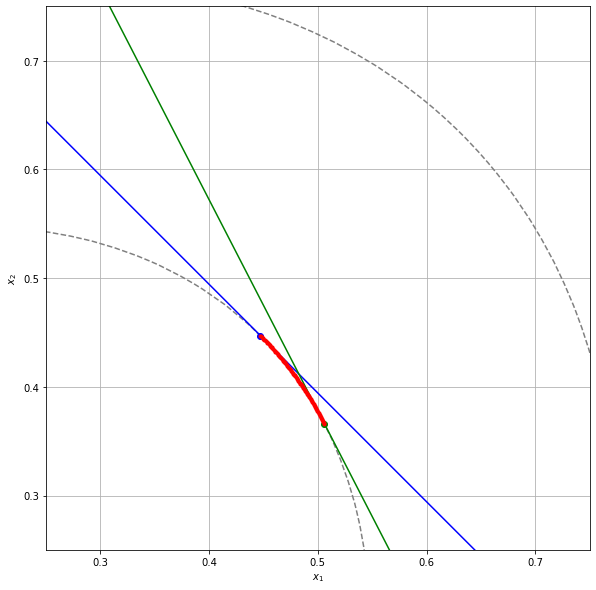

In [22]:
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels= 10 # 10 levels, automatically selected
)

#on définit le point P0 et on le place
(x0,y0) = (Newton(f1_bis,0.8,0.8))
plt.plot(x0,y0,'bo')

#on définit le point P1 et on le place
(x1,y1) = points_suite(f1,x0,y0,0.8)
plt.plot(x1,y1,'go')

#on calcule les vecteurs u0 et u1 associés
(u0,v0) = tangente(x0,y0,f1)
(u1,v1) = tangente(x1,y1,f1)

#on trace les tangentes associées aux vecteurs
a0 = v0/u0
b0 = y0 -a0 * x0

a1 = v1/u1
b1 = y1 -a1 * x1

def f_affine(a,b,x):
    return a*x + b

plt.plot(liste_t,f_affine(a0,b0,liste_t),'b')
plt.plot(liste_t,f_affine(a1,b1,liste_t),'g')




# on applique enfin gamma à la liste des points t et on trace la courbe en rouge
g = gamma(liste_t,(x0,y0),(x1,y1),(u0,v0),(u1,v1))
plt.plot(g[0],g[1],'r.')

plt.axis([0.25,0.75,0.25,0.75])
plt.show()



#### Tâche 7

In [23]:
def level_curve_interpol(f, x0, y0, c, oversampling, delta=0.1, N=1000, eps=1e-10):
    liste_x = [x0]
    liste_y = [y0]
    

    # on définit une fonction F issue de f et allant de R^2 dans R^2 
    # afin de vérifier avec la méthode de Newton:
        #1) la condition "le point est sur la ligne de niveau c"
        #2) la condition "le nouveau point est à distance delta du point précédent"
    def F(x,y):
        dist = np.sqrt((x - x1)**2 + (y - y1)**2)
        return np.array([f(x,y) - c, dist - delta ])
    
    # on initialise (x1,y1) 
    (x1,y1) = (x0,y0)
    

    for n in range (N-1):
        # on note d'abord (u,v) les coordonnées du grad(f) au point (x1,y1), puis on met dans (u,v) 
        # les coordonnées du vecteur orthogonal au grad pointant dans la direction 
        # "à droite" de celui-ci, qu'on multiplie par la distance delta
        (u,v) = grad(f)(x1,y1)
        (u,v) = np.array(delta) * (v,-u) / np.sqrt(u**2 + v**2)

        # on appelle (x,y) le point donné par (x1,y1) + (u,v) 
        # (on part du point (x1,y1) et on se déplace d'une distance delta selon le vecteur (u,v))
        (x,y) = (x1+u,y1+v)

        # le point donné par Newton(F,x,y) est notre prochain point d'annulation 
        # et donc notre nouveau point (x1,y1)
        (x1,y1) = Newton(F,x,y)
        
        # cette fois, on "append" la liste à la fin car on va éventuellement rajouter des points 
        # entre nos deux derniers points par interpolation
        
        
        
        
        # on choisit désormais de comparer le dernier segment en date avec le premier créé, voir justification en Q7
        
        
        #on ne calcule qu'une seule fois alpha2 et beta2 (les alpha/beta fixes correspondant au premier point) 
        #pour optimiser le programme, et on distingue le cas n = 0 où il n'y a encore aucun segment des cas suivants:
        
        if n ==  0:
            xmin = min(x0,x1)
            xmax = max(x0,x1)
            ymin = min(y0,y1)
            ymax = max(y0,y1)

            
            if x1 != x0:
                alpha2 = (y1-y0)/(x1-x0)
                beta2 = y1 - alpha2*x1
            else :
                alpha2 = "infini"
                beta2 = "-infini"
                
            

            

                
        if n> 1:   
            # on calcule le coeff directeur du dernier segment en date 
            # si segment AB, yb = alpha * xb + bêta, et ya = alpha * xa + bêta
            # ici on a "avancé" de delta vers la droite donc nécessairement xb - xa est non nul

            xa,xb,ya,yb = liste_x[-1],x1,liste_y[-1],y1
            # le dernier segment est le segment [AB]

            if xb == xa :
                # on se retrouve dans le cas où le segment est "vertical" i.e qui suit la direction de la pesanteur,
                # du fil à plomb en un lieu 
                alpha1 = "infini"
                beta1 = "-infini"
                
            else:
                # sinon, on peut calculer le coefficient directeur alpha1 et l'ordonnée à l'origine beta1 de la droite
                # portée par le segment AB
                alpha1 = (yb-ya)/(xb-xa)
                beta1 = yb - alpha1*xb
        
            

            if alpha1 == "infini" :
                 # cas particulier 1 où le segment AB est vertical
                if xmin <= xa <= xmax:
                     if ymin <= max(ya,yb) <= ymax or ymin <= min(ya,yb) <= ymax:
                        taille = len(liste_x)
                        liste = liste_x + liste_y
                        tab = np.array(liste)
                        tab = np.reshape(tab,(2,taille))
                        return tab 

            elif alpha2 == "infini":
                # cas particulier 2 où le segment initial est vertical
                if min(xa,xb) <= x0 <= max(xa,xb):
                    if ymin <= max(ya,yb) <= ymax or ymin <= min(ya,yb) <= ymax:
                        taille = len(liste_x)
                        liste = liste_x + liste_y
                        tab = np.array(liste)
                        tab = np.reshape(tab,(2,taille))
                        return tab       


            elif alpha1 != alpha2: #en gros, les droites portées par alpha1 et alpha2 se croisent, en pratique quasi toujours vrai
                xinter = (beta2-beta1)/(alpha1 - alpha2)
                yinter = alpha1*xinter + beta1
                # on a calculé ici les coordonnées du point d'intersection entre la droite portée par le dernier segment et celle portée
                # par le (i+1)-ème
                # il reste à vérifier que ce point d'intersection est dans les segments (alors les segments s'intersectent)
                xmax_prim = max(xb,xa)
                xmin_prim = min(xb,xa)

                if (xmin_prim <= xinter <= xmax_prim) and (xmin <= xinter <= xmax): 
                    # si True, ici le point (xinter,yinter) est entre A et B, donc sur le dernier segment, et ce dernier intersecte donc
                    # le (i+1)-ème segment, on renvoie donc la liste actuelle de points, et ce peu importe la valeur d'oversampling
                    taille = len(liste_x)
                    liste = liste_x + liste_y
                    tab = np.array(liste)
                    tab = np.reshape(tab,(2,taille))
                    return tab

            elif alpha1 == alpha2:
                
                if xmin <= max(xa,xb) <= xmax or xmin <= min(xa,xb) <= xmax:
                    taille = len(liste_x)
                    liste = liste_x + liste_y
                    tab = np.array(liste)
                    tab = np.reshape(tab,(2,taille))
                    return tab
                
                
            # ici, le dernier segment n'intersecte pas le premier, donc on est dans le cas général, c'est seulement maintenant qu'on va regarder la valeur d'oversampling
            # on supposera que l'utilisateur connaît l'usage qu'on fait de la fonction, et rentre donc une valeur entière non nulle pour 'oversampling'
        if oversampling > 1 :
            N = oversampling - 1
            t = np.linspace(0,1,N+2) # on veut rajouter N points entre les 2 derniers, donc t est de longueur N+2
            dernier_point= (x1,y1)
            avant_dernier = (liste_x[-1],liste_y[-1])
            grad1 = grad(f)(avant_dernier[0], avant_dernier[1])
            grad2 = grad(f)(dernier_point[0],dernier_point[1])
            u1x, u1y = grad1[1], -grad1[0]
            u2x, u2y = grad2[1], -grad2[0]
            u1 = (u1x,u1y)
            u2 = (u2x,u2y)
            liste_temporaire = gamma(t,avant_dernier,dernier_point,u1,u2)

            # dans liste_temporaire, il y a tous les points d'interpolation entre les deux derniers points.
            # cependant, dans liste_x et liste_y, il y a les coordonnées du point avant_dernier, qui sont aussi dans liste_temporaire. Il faut donc les supprimer.
            liste_x.pop()
            liste_y.pop()
            liste_x = liste_x + list(liste_temporaire[0])
            liste_y = liste_y + list(liste_temporaire[1])

        else:
            # on n'oublie pas de rajouter le dernier point à la liste des points d'annulation si on n'a pas à faire d'interpolation
            liste_x.append(x1)
            liste_y.append(y1)
        
    liste = liste_x + liste_y
    taille = len(liste_x)
    tab = np.array(liste)
    tab = np.reshape(tab,(2,taille))
    return tab

##### Test 

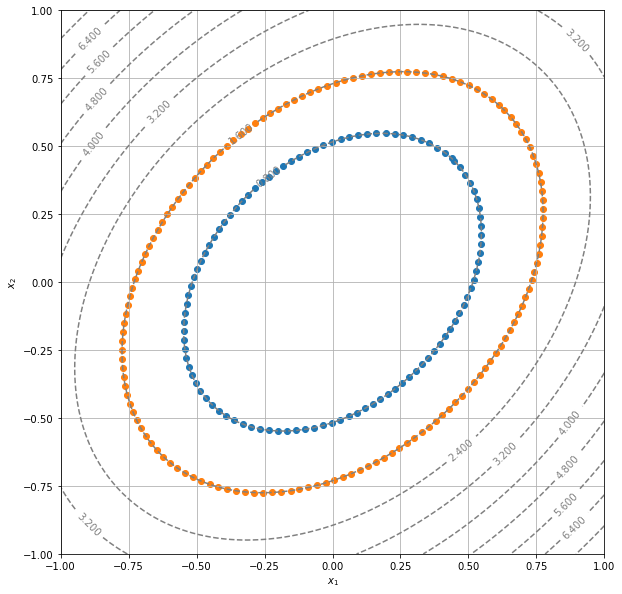

In [24]:
#on teste avec la fonction 1

display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

#(on rappelle que f1_bis est la fonction (x,y)-->(f1(x,y)-0.8,x-y))
(x0,y0) = Newton(f1_bis,0.8,0.8)
contour = level_curve_interpol(f1,x0,y0,0.8,3)
plt.scatter(contour[0,:], contour[1,:])

#on rappelle que la fonction f1_ter est la fonction (x,y)-->(f1(x,y)-1.6,x-y)

(x0,y0) = Newton(f1_ter,1.6,1.6)
contour = level_curve_interpol(f1,x0,y0,1.6,3)
plt.scatter(contour[0,:], contour[1,:])

plt.show()

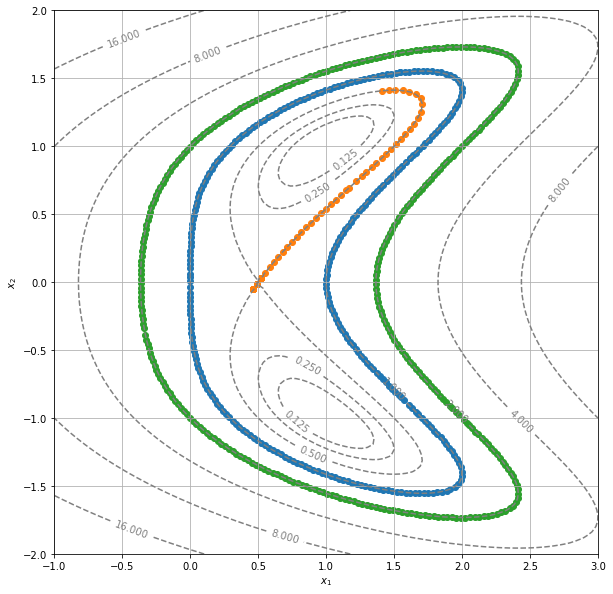

In [25]:
# on teste avec la fonction 2

display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

(x0,y0) = Newton(f2_bis,2.0,2.0)
contour = level_curve_interpol(f2,x0,y0,1.0,3)
plt.scatter(contour[0,:], contour[1,:])


#on rappelle que f2_ter est la fonction (x,y) -> (f(x,y) - 0.5, x-y)

(x0,y0) = Newton(f2_ter,1.5,1.5)
contour = level_curve_interpol(f2,x0,y0,0.5,2)
plt.scatter(contour[0,:], contour[1,:])

#on rappelle que f2_quatr est la fonction (x,y) -> (f(x,y) - 2, x-y)

(x0,y0) = Newton(f2_quatr,-0.5,-0.5)
contour = level_curve_interpol(f2,x0,y0,2.,3)
plt.scatter(contour[0,:], contour[1,:])
plt.show()


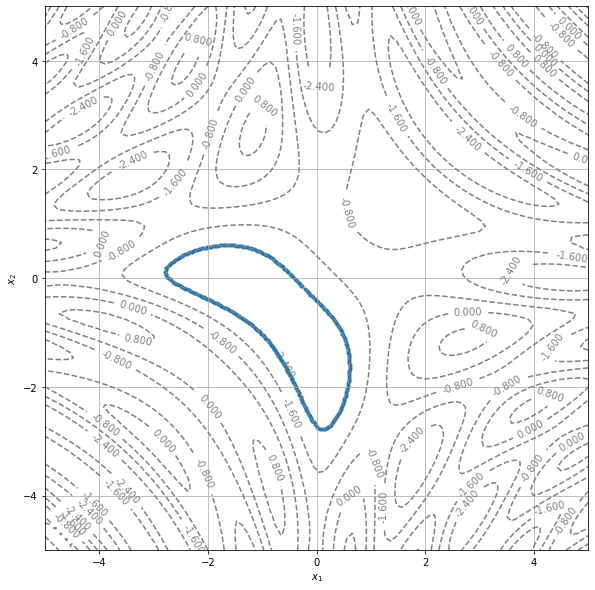

In [26]:
#on teste avec la fonction 3

display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

(x0,y0) = Newton(f3_bis,-0.4,-0.4)
contour = level_curve_interpol(f3,x0,y0,-2.4,3)
plt.scatter(contour[0,:], contour[1,:],marker = '.')
plt.show()

## FIN